In [1013]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import plotly.express as px
from pypfopt import EfficientFrontier
#conda install -c plotly chart-studio
from chart_studio import plotly
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Importing data

In [1014]:
esg_data = pd.read_excel('esg.xlsx', header=[0,1], index_col=0)
esg_data

Last Price                                              \
Date       AAPL US Equity TSLA US Equity MSFT US Equity UEC US Equity   
2006-12-31          2.750          0.000        29.8600        0.0000   
2007-12-31          7.074          0.000        35.6000        3.0600   
2008-12-31          3.048          0.000        19.4400        2.1800   
2009-12-31          7.526          0.000        30.4800        3.7800   
2010-12-31         11.520          1.775        27.9100        6.0400   
2011-12-30         14.464          1.904        25.9600        3.0600   
2012-12-31         19.006          2.258        26.7097        2.5600   
2013-12-31         20.036         10.029        37.4100        2.0000   
2014-12-31         27.595         14.827        46.4500        1.7500   
2015-12-31         26.315         16.001        55.4800        1.0600   
2016-12-30         28.955         14.246        62.1400        1.1200   
2017-12-29         42.308         20.757        85.5400        1.7700   
2018-12-31         39.435         22.187       101.5700        1.2500   
2019-12-31         73.413         27.889       157.7000        0.9192   
2020-12-31        132.690        235.223       222.4200        1.7600   
2021-12-31        177.570        352.260       336.3200        3.3500   
2022-12-30        129.930        386.900       239.8200        3.8800   

                                                                       \
Date       DIS US Equity F US Equity EBAY US Equity MAERSKB DC Equity   
2006-12-31       33.8144        7.51        13.8100        1647.31000   
2007-12-31       32.2800        6.73        13.9689        1878.78176   
2008-12-31       22.6900        2.29         5.8755         931.44229   
2009-12-31       32.2500       10.00         9.9033        1234.63323   
2010-12-31       37.5100       16.79        11.7130        1573.08887   
2011-12-30       37.5000       10.76        12.7652        1157.34675   
2012-12-31       49.7900       12.95        21.4638        1321.70687   
2013-12-31       76.4000       15.43        23.0915        1905.90254   
2014-12-31       94.1900       15.50        23.6197        1767.69623   
2015-12-31      105.0800       14.09        27.4800        1148.66194   
2016-12-30      104.2200       12.13        29.6900        1399.27627   
2017-12-29      107.5100       12.49        37.7400        1532.24543   
2018-12-31      109.6500        7.65        28.0700        1097.52898   
2019-12-31      144.6300        9.30        36.1100        1442.01474   
2020-12-31      181.1800        8.79        50.2500        2245.62273   
2021-12-31      154.8900       20.77        66.5000        3568.22228   
2022-12-30       86.8800       11.63        41.4700        2249.87757   

                                       ... Governance Disclosure score  \
Date       MCD US Equity BA US Equity  ...              MNST US Equity   
2006-12-31         42.18        64.17  ...                      0.0000   
2007-12-31         58.91        87.46  ...                      0.0000   
2008-12-31         62.19        42.67  ...                      0.0000   
2009-12-31         62.44        54.13  ...                      0.0000   
2010-12-31         76.76        65.26  ...                      0.0000   
2011-12-30        100.33        73.35  ...                      0.0000   
2012-12-31         88.21        75.36  ...                      0.0000   
2013-12-31         97.03       136.49  ...                     74.6237   
2014-12-31         93.70       129.98  ...                     74.6237   
2015-12-31        118.14       144.59  ...                     84.2866   
2016-12-30        121.72       155.68  ...                     84.9789   
2017-12-29        172.12       294.91  ...                     84.4070   
2018-12-31        177.57       322.50  ...                     84.9789   
2019-12-31        197.61       325.76  ...                     84.9789   
2020-12-31        214.58       214.06  ...             

In [1015]:
temp = esg_data['Last Price'].pct_change()
esg_last_price_tmp = temp.replace([np.inf, -np.inf], np.nan).dropna()
esg_last_price = esg_last_price_tmp.iloc[:,:5]
esg_last_price


Date,AAPL US Equity,TSLA US Equity,MSFT US Equity,UEC US Equity,DIS US Equity
2011-12-30,0.255556,0.072676,-0.069867,-0.493377,-0.000267
2012-12-31,0.314021,0.185924,0.028879,-0.163399,0.327733
2013-12-31,0.054193,3.441541,0.400615,-0.218750,0.534445
2014-12-31,0.377271,0.478413,0.241647,-0.125000,0.232853
2015-12-31,-0.046385,0.079180,0.194403,-0.394286,0.115617
2016-12-30,0.100323,-0.109681,0.120043,0.056604,-0.008184
2017-12-29,0.461164,0.457041,0.376569,0.580357,0.031568
2018-12-31,-0.067907,0.068892,0.187398,-0.293785,0.019905
2019-12-31,0.861620,0.256997,0.552624,-0.264640,0.319015
2020-12-31,0.807446,7.434257,0.410399,0.914708,0.252714


## Covariance matrix

In [1016]:
def cov_matrix(stocks):
    # Extract the data
    X = stocks.values

    # Extract the number of rows and columns
    N, M = stocks.shape

    # Calculate the covariance matrix
    cov = np.zeros((M, M))

    for i in range(M):

        # Mean of column "i"
        mean_i = np.sum(X[:, i]) / N

        for j in range(M):

            # Mean of column "j"
            mean_j = np.sum(X[:, j]) / N

            # Covariance between column "i" and column "j"
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov

In [1017]:
cov_ma = cov_matrix(esg_last_price)
cov_ma

array([[ 0.11571647,  0.32354056,  0.05610609,  0.0612282 ,  0.04042335],
       [ 0.32354056,  4.90337051,  0.20181249,  0.52845539,  0.23110952],
       [ 0.05610609,  0.20181249,  0.061726  ,  0.04592615,  0.03388259],
       [ 0.0612282 ,  0.52845539,  0.04592615,  0.23881681, -0.03228228],
       [ 0.04042335,  0.23110952,  0.03388259, -0.03228228,  0.06483556]])

In [1018]:
# Compare with pandas covariance matrix
pd_cov = returns.cov().values
pd_cov_diff = np.sum(np.abs(cov - pd_cov))
print('Difference from pandas cov. mat.: {:.6f}'.format(pd_cov_diff))

Difference from pandas cov. mat.: 0.000005


### Covariance matrix set up in panda dataframe

In [1019]:
df = pd.DataFrame(cov_ma)
df

,0,1,2,3,4
0,0.115716,0.323541,0.056106,0.061228,0.040423
1,0.323541,4.903371,0.201812,0.528455,0.231110
2,0.056106,0.201812,0.061726,0.045926,0.033883
3,0.061228,0.528455,0.045926,0.238817,-0.032282
4,0.040423,0.231110,0.033883,-0.032282,0.064836


## Mean return of each stock

In [1020]:
def mean_return(stocks):
    price = stocks.values
    N, M = stocks.shape

    mean_re = np.zeros(M)

    for i in range(N):
                mean_re += price[i] / N

    return mean_re

In [1021]:
return_mean = esg_last_price.mean()
return_mean

Date
AAPL US Equity    0.265604
TSLA US Equity    1.080095
MSFT US Equity    0.222323
UEC US Equity     0.055004
DIS US Equity     0.103434
dtype: float64

In [1022]:
mean_re = mean_return(esg_last_price)
mean_re


array([0.26560376, 1.08009459, 0.22232283, 0.05500418, 0.10343414])

In [1023]:
n = esg_last_price.to_numpy().shape[1]
n

5

## Rolling window covariance matrix and expected return

In [1024]:
def rolling_er_cov(stocks, window):
    rolling_er = []
    rolling_cov = []
    for i in range(0,11):
        rolling_er.append(mean_return(stocks[i:i+window]))
        rolling_cov.append(cov_matrix(stocks[i:i+window]))
    return rolling_er, rolling_cov

In [1025]:
er, cova = rolling_er_cov(esg_last_price, 10)

## Effecient frontier

In [1026]:
Mean_re_vector = mean_re
covariance_matrix = cov_ma

In [1039]:
#Helper function to finde various performance measures for the portfolio
def portfolio_performance(returns_mean,cov_matrix,num_portfolios,riskfree_rate=0):
    
    #Defining lists that are used later for calculations
    weight = np.zeros((num_portfolios,n))
    expectedReturn = np.zeros(num_portfolios)
    expectedVolatility = np.zeros(num_portfolios)
    SharpeRatio = np.zeros(num_portfolios)
    
    #We use a minimizer so we create a helper function find the negative sharpe ratio, which will be the highest
    def negativeSR(w):
        w = np.array(w)
        #Calculating volatility with help from numpy square root function
        V = np.sqrt(w.T @ cov_matrix @ w)
        #Calculating the expected return of our portfolio. Summing over each mean return for a stock multiplied by a weight - Making use of the numpy sum function
        R = np.sum(returns_mean * w)
        SR = R/V
        return -1*SR

    #Helper function used as a constraint
    def checkSumToOne(w):
        return np.sum(w)-1

    #Function to calculate volatility, and to later minimize the volatility for a given target return
    def minimizeMyVolatility(w):
        w = np.array(w)
        V = np.sqrt(w.T @ cov_matrix @ w)
        return V

    #Function to calculate the expected return of a portfolio given certain weights
    def getReturn(w):
        w = np.array(w)
        R = np.sum(returns_mean * w)
        return R    
    
    #Looping through each portfolio
    for k in range(num_portfolios):
        # generate random weight vector
        w = np.array(np.random.random(n))
        
        #Normalize it
        w = w / np.sum(w)
        
        #Put the weight into the list
        weight[k,:] = w
        
        #Using earlier defined empty list to calculate Expected return in %
        expectedReturn[k] = np.sum(returns_mean * w)
        
        #Expected volatility
        expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
        
        # Sharpe ratio
        SharpeRatio[k] = (expectedReturn[k]-riskfree_rate) / expectedVolatility[k]    
    
    #Define the linspace for the target values
    frontier_y = np.linspace(0.1,0.7,200)
    
    #Empty list for optimal volatility weights
    volatility_opt = []
    

    #Create the initial guess
    w0 = n*[1./n]
    
    #Create the constraints, that the portfolio weights has to be between 0 and 1
    constraintSet = (0,1)
    bounds = tuple(constraintSet for asset in range(n))
    
    #Loop through each target value and find the optimal volatility
    for R in frontier_y:

        constraints = ({'type':'eq', 'fun':checkSumToOne},
                      {'type':'eq', 'fun': lambda w: getReturn(w) - R})
        #Minimizing the volatiliy
        opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
        #Appending our minimized volatility to our empty list
        volatility_opt.append(opt['fun'])
        
    #Find the optimal point with the highest sharpe ratio
    constraints = ({'type':'eq', 'fun':checkSumToOne})
    w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    sharpe_exp = getReturn(w_opt)
    sharpe_vol = minimizeMyVolatility(w_opt)

    #Find the point for the minimum variance portfolio
    w_min = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints).x
    mvp_exp = getReturn(w_min)
    mvp_vol = minimizeMyVolatility(w_min)

    frontier_x = []

    for possible_return in frontier_y:
        cons = ({'type':'eq', 'fun':checkSumToOne},
                {'type':'eq', 'fun': lambda w: getReturn(w) - possible_return})
    
        result = minimize(minimizeMyVolatility,w0,method='SLSQP', bounds=bounds, constraints=cons)
        frontier_x.append(result['fun'])

    
    return expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, (sharpe_exp,sharpe_vol,(sharpe_exp-riskfree_rate) / sharpe_vol), frontier_y, frontier_x, w_opt, mvp_exp, mvp_vol

In [1040]:
num_portfolios = 1000
expectedReturn, expectedVolatility, SharpeRatio, volatility_opt, sharpepoint, y, x, weightlist, mvp_exr, mvp_std = portfolio_performance(Mean_re_vector,covariance_matrix,num_portfolios,riskfree_rate=0)

In [1041]:
sharpepoint

(0.2460711721421596, 0.26307438024332624, 0.9353672976994574)

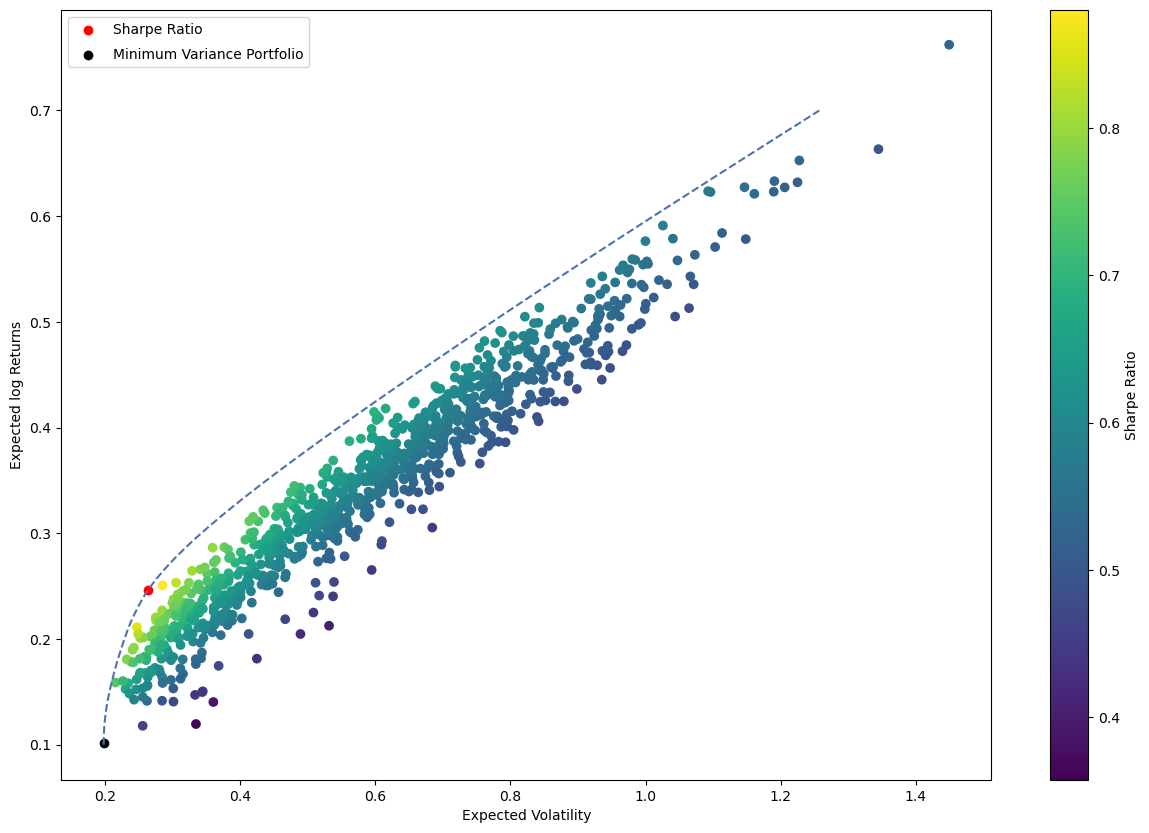

In [1042]:
#Test plot to see if it works
plt.figure(figsize=(15,10))
plt.scatter(expectedVolatility, expectedReturn, c = SharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sharpepoint[1], sharpepoint[0], c='red', label='Sharpe Ratio')
plt.scatter(mvp_std, mvp_exr, c='black', label='Minimum Variance Portfolio')
plt.plot(x, y, '--')
plt.legend(labelspacing=0.8)
plt.show()